In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Coursera

1. Coursera Inc. es un proveedor masivo de cursos abiertos en línea con sede en EE. UU. fundado en 2012 por los profesores de informática de la Universidad de Stanford, Andrew Ng y Daphne Koller. Coursera trabaja con universidades y otras organizaciones para ofrecer cursos, certificaciones y títulos en línea en una variedad de temas.

En los EE. UU. y Canadá, Coursera cobra $ 39 / mes después del período de prueba gratuito inicial de 7 días. El certificado se puede completar en menos de 6 meses de estudio a tiempo parcial, lo que significa que la mayoría de los estudiantes lo completan por menos de $300 USD. En otros países donde está disponible el Certificado de Soporte de TI, su costo puede ser menor.

Los cursos de Coursera normalmente pueden tener una duración de no más de 6 semanas

In [659]:
coursera_courses = pd.read_csv('./Moocs/Coursera_courses.csv')
coursera_review = pd.read_csv('./Moocs/Coursera_reviews.csv')

2. Exploración de los datos

In [660]:
coursera_courses.head(10)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
5,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,financial-markets-global
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
7,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python
8,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,computer-networking
9,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone


In [665]:
coursera_courses.course_id.value_counts()

machine-learning                             1
english-composition                          1
wharton-communication-skills                 1
introduction-trading-machine-learning-gcp    1
python-programming-introduction              1
                                            ..
solar-energy-basics                          1
bootstrap-4                                  1
google-cloud-java-spring                     1
forensic-science                             1
data-science-course                          1
Name: course_id, Length: 623, dtype: int64

- Hay 623 cursos diferentes en el dataset

In [667]:
coursera_courses.duplicated().sum()

0

In [662]:
coursera_review.head(3)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training


In [664]:
coursera_review.course_id.value_counts()

python                                        45218
machine-learning                              35895
neural-networks-deep-learning                 35750
technical-support-fundamentals                35319
python-data                                   33546
                                              ...  
social-economic-networks                          6
intro-to-healthcare                               6
entrepreneurship-strategy                         6
epigenetics                                       6
building-modern-python-applications-on-aws        3
Name: course_id, Length: 604, dtype: int64

- Hay 604 cursos diferentes

In [668]:
# Cruzar las tablas coursera_courses y coursera_review a tráves de la columna course_id
coursera_review_unique = pd.merge(coursera_courses,coursera_review,on='course_id', how='left')

In [669]:
coursera_review_unique.head(2)

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1.0
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1.0


In [670]:
# Valores nulos 
coursera_review_unique.isnull().sum()

name              0
institution       0
course_url        0
course_id         0
reviews         159
reviewers        19
date_reviews     19
rating           19
dtype: int64

In [671]:
# Se eliminan los valores nulos
coursera_review_unique.dropna(inplace=True)

In [673]:
coursera_review_unique.name.value_counts()

Programming for Everybody (Getting Started with Python)    45218
Machine Learning                                           35895
Neural Networks and Deep Learning                          35749
Technical Support Fundamentals                             35316
Python Data Structures                                     33543
                                                           ...  
Social and Economic Networks:  Models and Analysis             6
Entreprise et changement climatique                            6
Epigenetic Control of Gene Expression                          6
Introduction to Healthcare                                     6
Building Modern Python Applications on AWS                     3
Name: name, Length: 603, dtype: int64

In [674]:
coursera_review_unique.rating.value_counts()

5.0    1146077
4.0     226667
3.0      48292
1.0      17350
2.0      16185
Name: rating, dtype: int64

In [675]:
# Agrupar por las columnas de interes y obtener el promedio del rating, considerando que hay muchas review del mismo curso
coursera= coursera_review_unique.groupby(['name','institution','course_url','course_id'])['rating'].mean().reset_index(name = 'rating')

In [676]:
coursera .head()

,name,institution,course_url,course_id,rating
0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,4.655556
1,A Law Student's Toolkit,Yale University,https://www.coursera.org/learn/law-student,law-student,4.697318
2,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone,4.843507
3,AI for Medical Diagnosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-diagnosis,4.602347
4,AI for Medical Prognosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-prognosis,4.698630


In [677]:
coursera.shape

(604, 5)

3. Web Scraping para encontrar los datos de level, language 

In [679]:
from bs4 import BeautifulSoup                   
import requests
import numpy as np

In [505]:
response = requests.get(coursera.course_url[200])

In [506]:
html_soup = BeautifulSoup(response.content, 'html.parser')

* Se eliminan las páginas que ya no información del curso 

In [681]:
index = coursera[coursera['course_url']=='https://www.coursera.org/learn/conversational-experiences-dialogflow'].index
coursera = coursera.drop(index )

In [682]:
index = coursera[coursera['course_url']=='https://www.coursera.org/learn/information-security-data'].index
coursera = coursera.drop(index )

In [683]:
index = coursera[coursera['course_url']=='https://www.coursera.org/learn/python-programming-introduction'].index
coursera = coursera.drop(index )

In [684]:
index = coursera[coursera['course_url']=='https://www.coursera.org/learn/international-taxation'].index
coursera = coursera.drop(index )

In [685]:
index = coursera[coursera['course_url']=='https://www.coursera.org/learn/dyslexia-difficulties'].index
coursera = coursera.drop(index )

In [686]:
# Codigo para encontrar en nivel en la página de Coursera
level = []
for i in coursera.course_url:
    response = requests.get(i)
    a = str(response)
    if a[11:14] != '404':
        html_soup = BeautifulSoup(response.content, 'html.parser')
        aux = 0
        for j in range(0,7):
            html =html_soup.find_all('div',class_='_1tu07i3a')[j].get_text(strip=True, separator=' ')
            a = html.startswith(('Intermediate', 'Beginner', 'Mixed','Advanced'))
            if  a == True:
                level.append(html)
                aux = 1
        if aux==0:
            level.append(None)    
coursera['level'] = pd.DataFrame(level)

In [687]:
coursera.level = coursera.level.astype(str)
coursera['level'] = coursera.level.apply(lambda x : x.split()[0])

In [688]:
coursera.head(3)

,name,institution,course_url,course_id,rating,level
0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,4.655556,Intermediate
1,A Law Student's Toolkit,Yale University,https://www.coursera.org/learn/law-student,law-student,4.697318,None
2,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone,4.843507,Beginner


In [695]:
#Se eliminan las filas donde el algoritmo encontro error 404
coursera = coursera[coursera['level']!='None']

In [696]:
coursera.head(3)

,name,institution,course_url,course_id,rating,level
0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,4.655556,Intermediate
2,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone,4.843507,Beginner
3,AI for Medical Diagnosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-diagnosis,4.602347,Intermediate


In [697]:
# Codigo para encontrar el idioma del curso en Coursera
languaje = []
for i in coursera.course_url:
    response = requests.get(i)
    a = str(response)
    if a[11:14] != '404':
        html_soup = BeautifulSoup(response.content, 'html.parser')
        aux = 0
        for j in range(0,7):
            html =html_soup.find_all('div',class_='_1tu07i3a')[j].get_text(strip=True, separator=' ')
            a = html.startswith(('English', 'Spanish', 'French','German','Portuguese','Russian'))
            if  a == True:
                languaje.append(html)
                aux = 1
        if aux==0:
            languaje.append(None)    
coursera['languaje'] = pd.DataFrame(languaje)

In [698]:
coursera.languaje = coursera.languaje.astype(str)
coursera['languaje'] = coursera.languaje.apply(lambda x : x.split()[0])

In [710]:
coursera.tail(10)

,name,institution,course_url,course_id,rating,level,languaje
594,Write Professional Emails in English,Georgia Institute of Technology,https://www.coursera.org/learn/professional-em...,professional-emails-english,4.817716,nan,nan
595,Write Your First Novel,Michigan State University,https://www.coursera.org/learn/write-your-firs...,write-your-first-novel,3.942308,nan,nan
596,Writing and Editing: Word Choice and Word Order,University of Michigan,https://www.coursera.org/learn/writing-editing...,writing-editing-words,4.776699,nan,nan
597,Writing in the Sciences,Stanford University,https://www.coursera.org/learn/sciwrite,sciwrite,4.927483,nan,nan
598,e-Learning Ecologies: Innovative Approaches to...,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/elearning,elearning,4.506494,nan,nan
599,Étudier en France: French Intermediate course ...,École Polytechnique,https://www.coursera.org/learn/etudier-en-france,etudier-en-france,4.844322,nan,nan
600,Математика и Python для анализа данных,Moscow Institute of Physics and Technology,https://www.coursera.org/learn/mathematics-and...,mathematics-and-python,4.635852,nan,nan
601,Основы программирования на Python,National Research University Higher School of ...,https://www.coursera.org/learn/python-osnovy-p...,python-osnovy-programmirovaniya,4.191964,nan,nan
602,Основы разработки на C++: белый пояс,Moscow Institute of Physics and Technology,https://www.coursera.org/learn/c-plus-plus-white,c-plus-plus-white,4.756024,nan,nan
603,Разработка веб-сервисов на Go - основы языка,Moscow Institute of Physics and Technology,https://www.coursera.org/learn/golang-webservi...,golang-webservices-1,4.715827,nan,nan


In [707]:
# Se excluyen las filas donde el programa no encontro algun idioma especificado
coursera = coursera[coursera['languaje']!='None']

In [711]:
# Se excluyen las filas donde la página da error 404
coursera = coursera[coursera['languaje']!='nan']

In [712]:
coursera.languaje.value_counts()

English       264
Spanish        15
French          8
Portuguese      2
Name: languaje, dtype: int64

In [713]:
coursera.level.value_counts()

Beginner        208
Intermediate     75
Advanced          6
Name: level, dtype: int64

In [1027]:
response = requests.get(coursera.course_url[21])
html_soup = BeautifulSoup(response.content, 'html.parser')
html = html_soup.find_all('div',class_='_jyhj5r')[0].get_text(strip=True, separator=' ')
html

'Browse Business Leadership and Management An Introduction to Consumer Neuroscience & Neuromarketing Filled Star Filled Star Filled Star Filled Star Half Faded Star 4.7 stars 2,885 ratings | Thumbs Up 96% Thomas Zoëga Ramsøy Enroll for Free Starts Jan 29 Financial aid available 149,827 already enrolled Offered By'

In [1010]:
ht = html.split()

In [1035]:
def nenrolled(x):
    j = 0
    a = 0
    h = x.split()
    for i in h:
        j = j +1
        if i == 'available':
            a = j
    return h[a]

In [1042]:
nenrolled(html)

'149,827'

In [1013]:
# Codigo para buscar el número de suscriptores por curso en Coursera
n_enrolled = []
for i in coursera.course_url:
    response = requests.get(i)
    a = str(response)
    if a[11:14] != '404':
        html_soup = BeautifulSoup(response.content, 'html.parser')
        html =html_soup.find_all('div',class_='_jyhj5r')[0].get_text(strip=True, separator=' ')
        n_enrolled.append(html) 
       
coursera['n_enrolled'] = pd.DataFrame(n_enrolled)

In [1052]:
coursera.n_enrolled = coursera.n_enrolled.astype(str)
coursera['n_enrolled'] = coursera.n_enrolled.apply(lambda x : nenrolled(x))

In [1054]:
# Se quita la coma
coursera["n_enrolled"].replace({',':''}, regex=True, inplace = True) 

In [1060]:
# Se excluye las filas donde codigo encontro Browse
coursera = coursera[coursera["n_enrolled"]!='Browse']

In [1061]:
# Se convierte de string a float
coursera.n_enrolled = coursera.n_enrolled.astype(float)

C:\Users\cquinayas\AppData\Local\Temp\ipykernel_8408\3631307199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursera.n_enrolled = coursera.n_enrolled.astype(float)


Se crea una columna price con el valor de 39 dolares que es lo que cuesta tomar un curso despues de 7 días que es el periodo de prueba donde el curso es gratis. El certificado se puede obtener en menos de 6 meses de estudio a tiempo parcial, lo que significa que la mayoría de los estudiantes lo completan por menos de 300 doláres

In [1102]:
coursera['price']=39

In [1076]:
# Se calculan las ventas 
coursera['ventas'] = coursera['n_enrolled']*coursera['price']

C:\Users\cquinayas\AppData\Local\Temp\ipykernel_8408\1005190036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursera['ventas'] = coursera['n_enrolled']*coursera['price']


In [1077]:
coursera.head(3)

,name,institution,course_url,course_id,rating,level,languaje,n_enrolled,price,ventas
0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,5.0,Intermediate,English,35459.0,39,1382901.0
4,AI for Medical Prognosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-prognosis,5.0,Intermediate,English,101185.0,39,3946215.0
5,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,https://www.coursera.org/learn/aws-fundamental...,aws-fundamentals-addressing-security-risk,4.0,Beginner,English,48257.0,39,1882023.0


In [714]:
coursera.rating=np.round(coursera.rating)


4. Visualización del conteo de los datos de las columnas level, language y rating

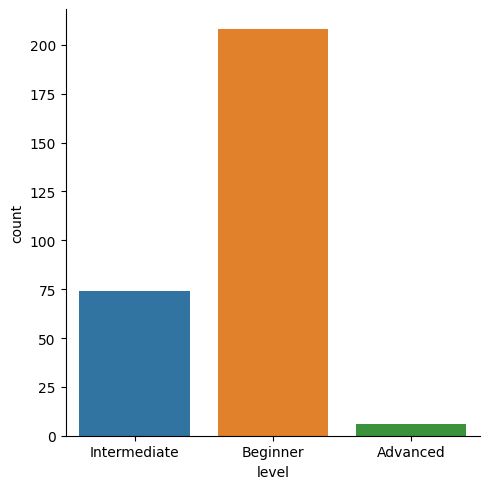

In [1071]:
sns.catplot(data=coursera,x='level',kind='count')

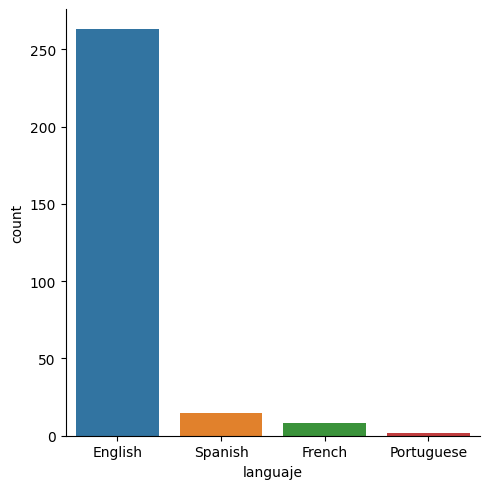

In [1072]:
sns.catplot(data=coursera,x='languaje',kind='count')

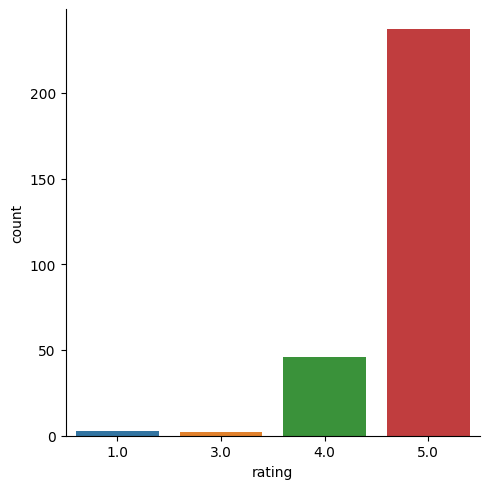

In [1073]:
sns.catplot(data=coursera,x='rating',kind='count')

In [1078]:
coursera.to_csv('coursera.csv')

## EDX

In [618]:
edx_courses = pd.read_csv('./Moocs/edx_courses.csv')

In [620]:
edx_courses.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [621]:
# Datos duplicados
edx_courses.duplicated().sum()

1

In [622]:
# Se eliminan los datos duplicados
edx_courses.drop_duplicates(inplace=True)

In [586]:
edx_courses.shape

(974, 16)

Los cursos en EDX son gratis durante un tiempo limitado pero si se quiere una certificación se debe pagar el costo del curso. Se considera que el número de estudiantes matriculados han pagado el curso

In [623]:
edx_courses['price']= edx_courses['price'].str.strip('FREE-Add a Verified Certificate for $ USD')

In [624]:
edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [590]:
edx_courses.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       557
course_url              0
dtype: int64

In [626]:
# Se elimina la columna course_syllabus
edx_courses= edx_courses.drop('course_syllabus',axis=1)

In [627]:
edx_courses.dropna(inplace=True)

In [628]:
edx_courses.isnull().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_url            0
dtype: int64

In [629]:
edx_courses["n_enrolled"].replace({',':''}, regex=True, inplace = True) 

In [630]:
edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...


In [631]:
edx_courses.n_enrolled = edx_courses.n_enrolled.astype(float)


In [632]:
edx_courses.n_enrolled.describe()

count    7.910000e+02
mean     5.432728e+04
std      1.229722e+05
min      5.001000e+03
25%      1.163700e+04
50%      2.358500e+04
75%      5.519100e+04
max      2.442271e+06
Name: n_enrolled, dtype: float64

<AxesSubplot: xlabel='n_enrolled'>

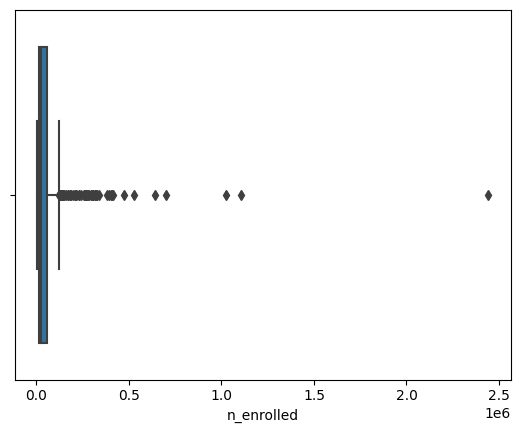

In [601]:
# Determinar si hay outliers en la columna n_enrolled
sns.boxplot(data=edx_courses,x='n_enrolled')

In [253]:
# Estadísticos para el boxplot
Q1 = edx_courses.n_enrolled.quantile(0.25)
Q2 = edx_courses.n_enrolled.median()
Q3 = edx_courses.n_enrolled.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = edx_courses.n_enrolled.min()
valor_maximo = edx_courses.n_enrolled.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(11764.25, 24119.0, 54652.5, 42888.25, 5001.0, 2442271.0)

In [602]:
#Valores de los bigotes inferiores y superiores
B1 = Q1 - 3*IRQ
B2 = Q3 + 3*IRQ
(B1,B2)

(-116900.5, 183317.25)

In [255]:
outlier_n_enrolled = edx_courses.n_enrolled> 183317
outlier_n_enrolled.sum()

42

In [633]:
# Eliminación de outliers
edx_courses = edx_courses[edx_courses['n_enrolled']<=183317]

<AxesSubplot: xlabel='n_enrolled'>

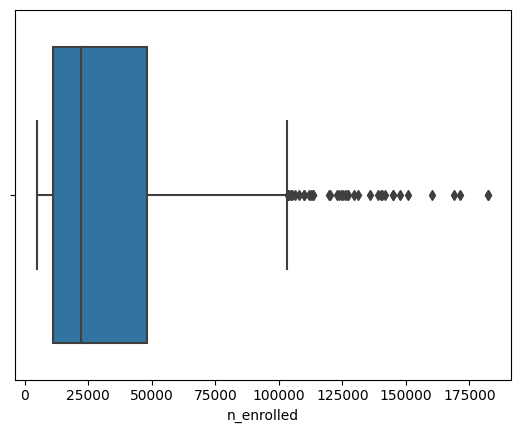

In [634]:
sns.boxplot(data=edx_courses,x='n_enrolled')

Como en la página de EDX no se especifica el rating del curso se segmenta por la cantidad de estudiante matriculados para asignar un rating de 1 a 5

In [258]:
max(edx_courses.n_enrolled)/5

36492.4

In [635]:
def ranking_edx(x):
    num = 36492
    if x>=0 and x <=num:
        category = 1
    if x>=num+1 and x <=2*num:
        category = 2
    if x>=(2*num)+1 and x <=3*num:
        category = 3
    if x>=(3*num)+1 and x <=4*num:
        category = 4
    if x>=(4*num)+1:
        category = 5
    return category

In [636]:
edx_courses['rating']=edx_courses.n_enrolled.apply(lambda x : ranking_edx(x))

In [900]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 973
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               750 non-null    object 
 1   summary             750 non-null    object 
 2   n_enrolled          750 non-null    float64
 3   course_type         750 non-null    object 
 4   institution         750 non-null    object 
 5   instructors         750 non-null    object 
 6   Level               750 non-null    object 
 7   subject             750 non-null    object 
 8   language            750 non-null    object 
 9   subtitles           750 non-null    object 
 10  course_effort       750 non-null    object 
 11  course_length       750 non-null    object 
 12  price               750 non-null    float64
 13  course_description  750 non-null    object 
 14  course_url          750 non-null    object 
 15  rating              750 non-null    int64  
dtypes: float

In [901]:
# Se crea la columna ventas
edx_courses['ventas'] = edx_courses['n_enrolled'] * edx_courses['price']

In [902]:
edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url,rating,ventas
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online,4,6124020.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge,4,25781445.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140.0,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249.0,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...,3,20203860.0


In [645]:
#se convierte la columna price a float
edx_courses.price = edx_courses.price.astype(float)

<AxesSubplot: xlabel='Level', ylabel='price'>

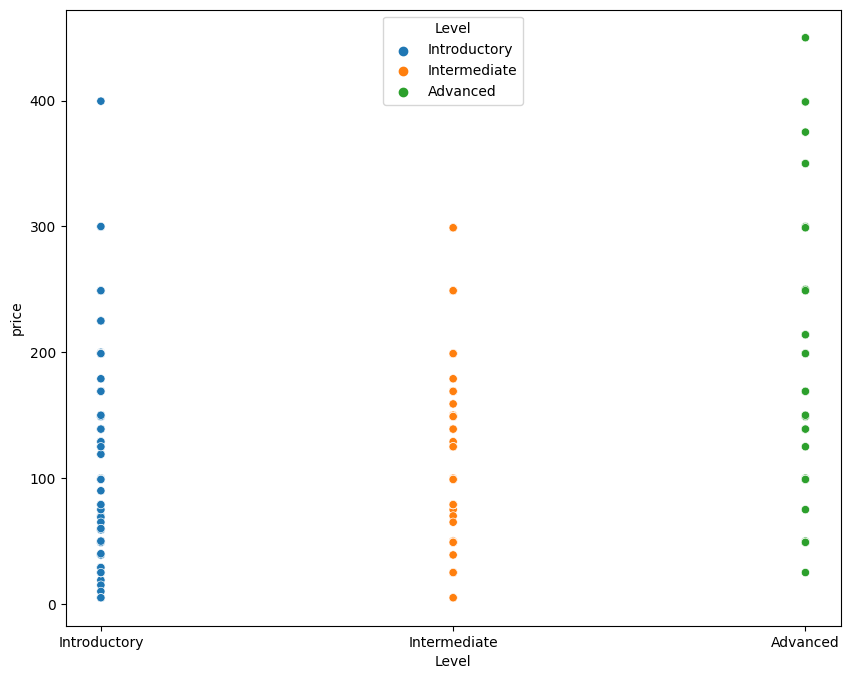

In [654]:
# Gráfico de dispersión del precio vs nivel de formación
plt.figure(figsize=(10,8))
sns.scatterplot(data=edx_courses,x='Level',y='price', hue='Level')

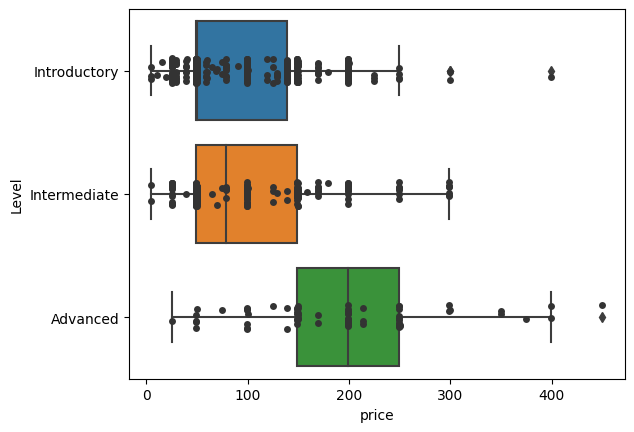

In [651]:
# Gráfico de cajas y dispersión del precio vs el nivel de formación
ax = sns.boxplot(
    data=edx_courses,
    x='price',
    y='Level',
    
)
ax = sns.stripplot(
    data=edx_courses,
    x='price',
    y='Level',
    color='0.2'
)

In [838]:
#Valor promedio de un curso de acuerdo al nivel
valor_prom_curso = edx_courses.groupby(['Level'])['price'].mean()


In [839]:
valor_prom_curso

Level
Advanced        190.899857
Intermediate    101.813762
Introductory     90.698511
Name: price, dtype: float64

Top 5 de los cursos con más ventas

In [961]:
ventas_prom_curso = edx_courses.groupby(['title','language','Level','price'])['ventas'].mean().reset_index(name = 'ventas_curso')

In [962]:
ventas_prom_curso.head(5)

,title,language,Level,price,ventas_curso
0,'Talk to me': Improving mental health and suic...,English,Introductory,139.0,1595859.0
1,18th-Century Opera: Handel & Mozart,English,Introductory,99.0,1814769.0
2,"19th-Century Opera: Meyerbeer, Wagner, & Verdi",English,Introductory,99.0,924660.0
3,A System View of Communications: From Signals ...,English,Introductory,60.0,2055660.0
4,AI Applications with Watson,English,Intermediate,99.0,908127.0


## Udemy

In [ ]:
udemy_courses = pd.read_csv('./Moocs/udemy_courses.csv')

In [1121]:
udemy_courses.head(3)

,course_id,title,url,is_paid,price,n_enrolled,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating,sales
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All,1.5,2017-01-18T20:58:58Z,Business Finance,English,2,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All,39.0,2017-03-09T16:34:20Z,Business Finance,English,2,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate,2.5,2016-12-19T19:26:30Z,Business Finance,English,2,97830


Se utiliza la libreria langdetect para detectar el idioma de los títulos de cursos

In [857]:
from langdetect import detect

In [862]:
udemy_courses['language']=udemy_courses.course_title.apply(lambda x : detect(x))

In [872]:
udemy_courses = udemy_courses[udemy_courses['languaje']!='zh-cn']

In [873]:
from iso639 import languages
udemy_courses['languaje'] = udemy_courses['languaje'].apply(lambda x: languages.get(alpha2=x).name)

C:\Users\cquinayas\AppData\Local\Temp\ipykernel_8408\2629195524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_courses['languaje'] = udemy_courses['languaje'].apply(lambda x: languages.get(alpha2=x).name)


In [874]:
udemy_courses.languaje.value_counts()

English                    2806
Spanish                     142
German                       90
Portuguese                   66
Catalan                      54
Italian                      42
Norwegian                    42
French                       42
Japanese                     29
Tagalog                      17
Dutch                        14
Afrikaans                    11
Arabic                        9
Romanian                      9
Danish                        8
Swedish                       8
Estonian                      5
Turkish                       4
Swahili (macrolanguage)       3
Russian                       3
Polish                        2
Vietnamese                    2
Thai                          2
Croatian                      2
Indonesian                    1
Korean                        1
Name: languaje, dtype: int64

In [126]:
udemy_courses.num_subscribers.describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

<AxesSubplot: xlabel='num_subscribers'>

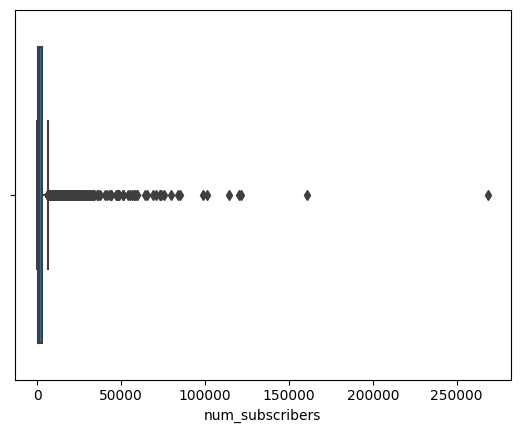

In [129]:
# Se detecta si hay outliers en la columna num_subscribers
sns.boxplot(data=udemy_courses,x='num_subscribers')

In [840]:
# Estadísticos para el boxplot
Q1 = udemy_courses.num_subscribers.quantile(0.25)
Q2 = udemy_courses.num_subscribers.median()
Q3 = udemy_courses.num_subscribers.quantile(0.75)
IRQ = Q3 -Q1
valor_minimo = udemy_courses.num_subscribers.min()
valor_maximo = udemy_courses.num_subscribers.max()
(Q1,Q2,Q3,IRQ,valor_minimo,valor_maximo)

(111.0, 911.5, 2546.0, 2435.0, 0, 268923)

In [841]:
#Valores de los bigotes inferiores y superiores
B1 = Q1 - 3*IRQ
B2 = Q3 + 3*IRQ
(B1,B2)

(-7194.0, 9851.0)

In [842]:
# Se excluyen los outliers
udemy_courses = udemy_courses[udemy_courses['num_subscribers']<=9851]

In [882]:
# Se crea un rating de los cursos con el número de suscriptores
max(udemy_courses.num_subscribers)/5

1969.4

In [883]:
def ranking_udemy(x):
    num = 1969
    if x>=0 and x <=num:
        category = 1
    if x>=num+1 and x <=2*num:
        category = 2
    if x>=(2*num)+1 and x <=3*num:
        category = 3
    if x>=(3*num)+1 and x <=4*num:
        category = 4
    if x>=(4*num)+1:
        category = 5
    return category

In [890]:
udemy_courses['rating']=udemy_courses.num_subscribers.apply(lambda x : ranking_udemy(x))

In [918]:
udemy_courses.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,languaje,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All,1.5,2017-01-18T20:58:58Z,Business Finance,English,2
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All,39.0,2017-03-09T16:34:20Z,Business Finance,English,2


<AxesSubplot: xlabel='num_subscribers'>

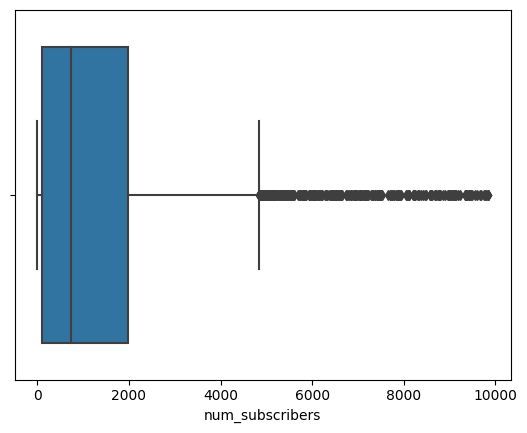

In [844]:
sns.boxplot(data=udemy_courses,x='num_subscribers')

Text(0.5, 1.0, 'Paid vs Free courses')

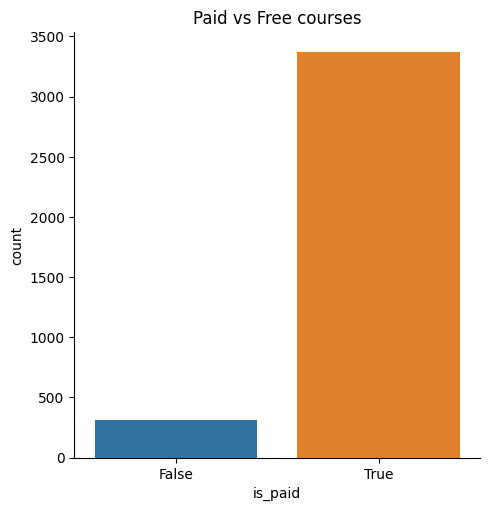

In [237]:
# Visualización de cursos pagos versus cursos gratuitos
sns.catplot(data=udemy_courses,x='is_paid',kind='count')
plt.title('Paid vs Free courses')

In [845]:
udemy_courses.is_paid.value_counts()

True     3190
False     228
Name: is_paid, dtype: int64

In [849]:
udemy_courses.level = udemy_courses.level.astype(str)
udemy_courses['level'] = udemy_courses.level.apply(lambda x : x.split()[0])

<AxesSubplot: xlabel='level', ylabel='count'>

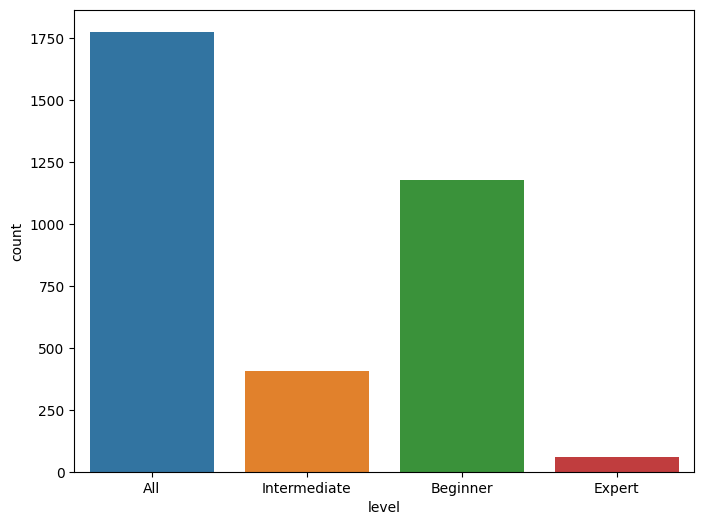

In [850]:
# Visualización de la frecuencia en la variable level
plt.figure(figsize=(8,6))
sns.countplot(x=udemy_courses.level)

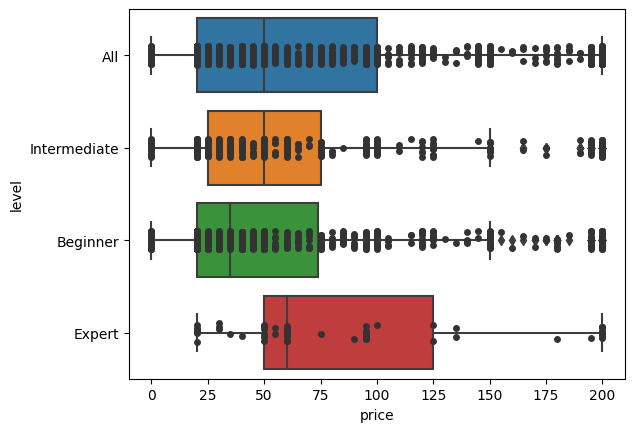

In [1108]:
# Gráfico de cajas y dispersión para visualizar el costo de los cursos por nivel de formación
ax = sns.boxplot(
    data=udemy_courses,
    x='price',
    y='level',
    
)
ax = sns.stripplot(
    data=udemy_courses,
    x='price',
    y='level',
    color='0.2'
)

<AxesSubplot: xlabel='price', ylabel='level'>

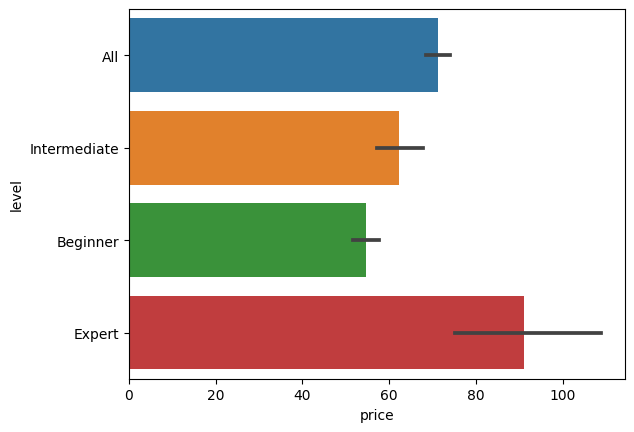

In [1110]:
sns.barplot(x="price", y='level', data=udemy_courses)

In [1120]:
#Valor promedio de un curso de acuerdo al nivel
valor_prom_curso = udemy_courses.groupby(['level'])['price'].mean().round(2)
valor_prom_curso.sort_values(ascending=False)

level
Expert          91.12
All             71.35
Intermediate    62.35
Beginner        54.69
Name: price, dtype: float64

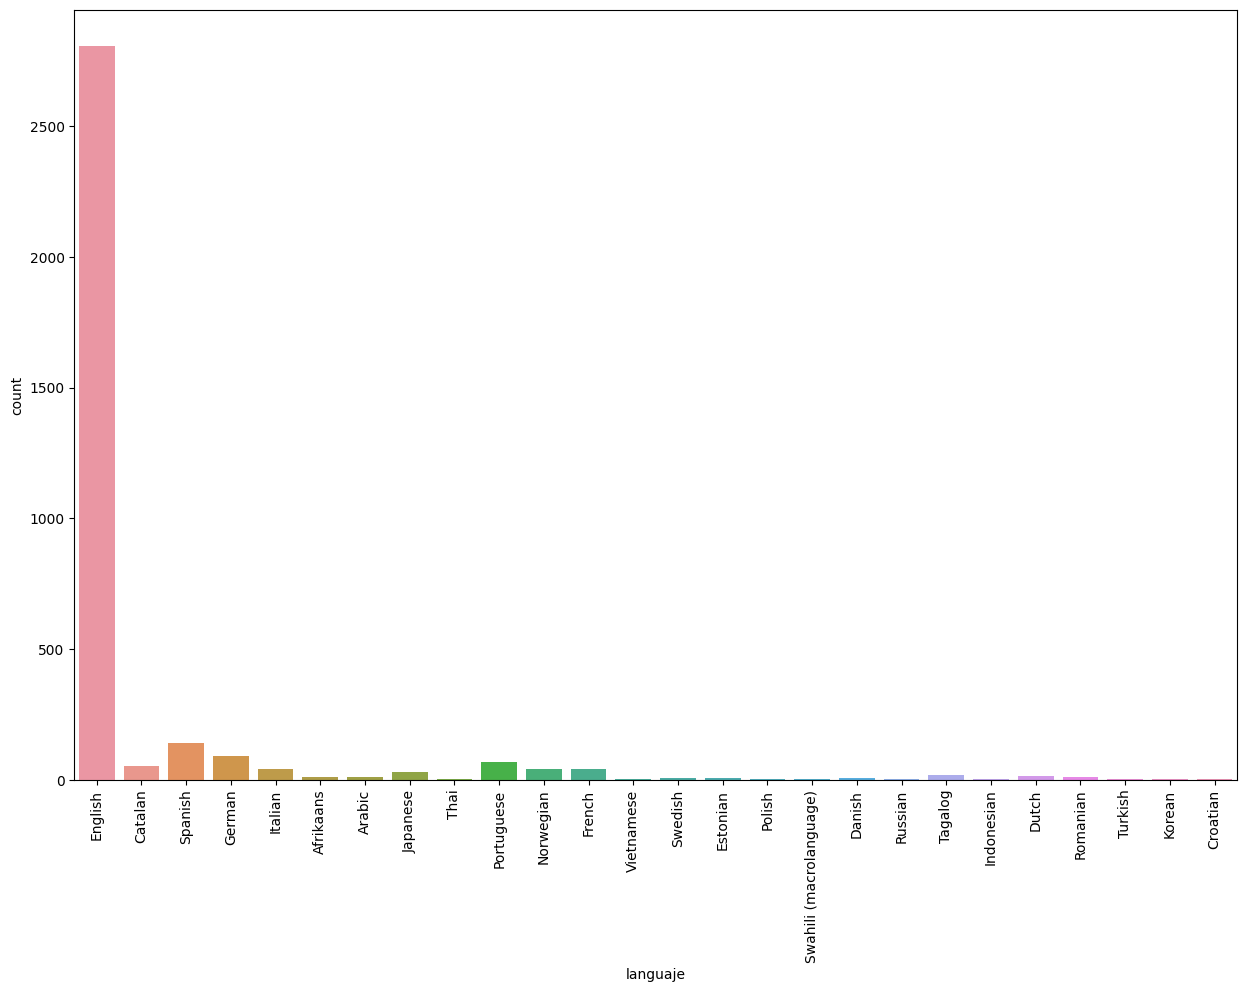

In [878]:
plt.figure(figsize=(15,10))
sns.countplot(x=udemy_courses.languaje)
plt.xticks(rotation = 90)
plt.show()

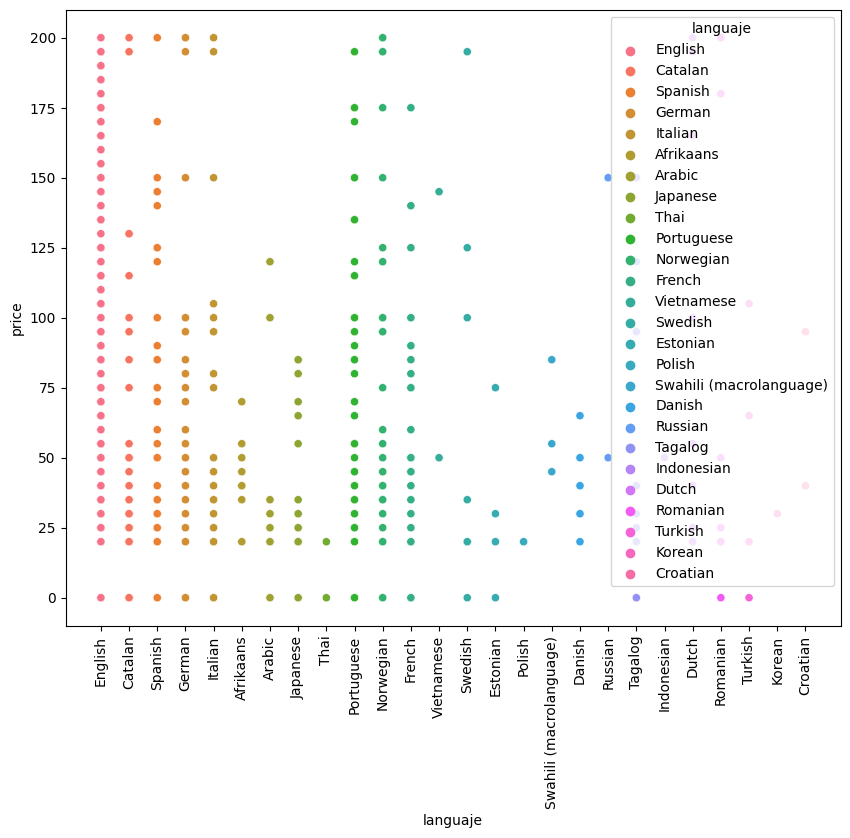

In [881]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=udemy_courses,x='languaje',y='price', hue='languaje')
plt.xticks(rotation = 90)
plt.show()

In [899]:
udemy_courses.languaje.value_counts()[0:5]

English       2806
Spanish        142
German          90
Portuguese      66
Catalan         54
Name: languaje, dtype: int64

In [886]:
udemy_courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'languaje',
       'rating'],
      dtype='object')

In [891]:
udemy_courses.rating.value_counts()

1    2553
2     459
3     208
4     116
5      78
Name: rating, dtype: int64

Top 5 de los cursos con mayor raiting

In [894]:
top_rate = pd.DataFrame(udemy_courses.sort_values(by = 'rating' , ascending = False))[['course_title','rating']].head(5)

Text(0.5, 1.0, 'top courses rated in Udemy')

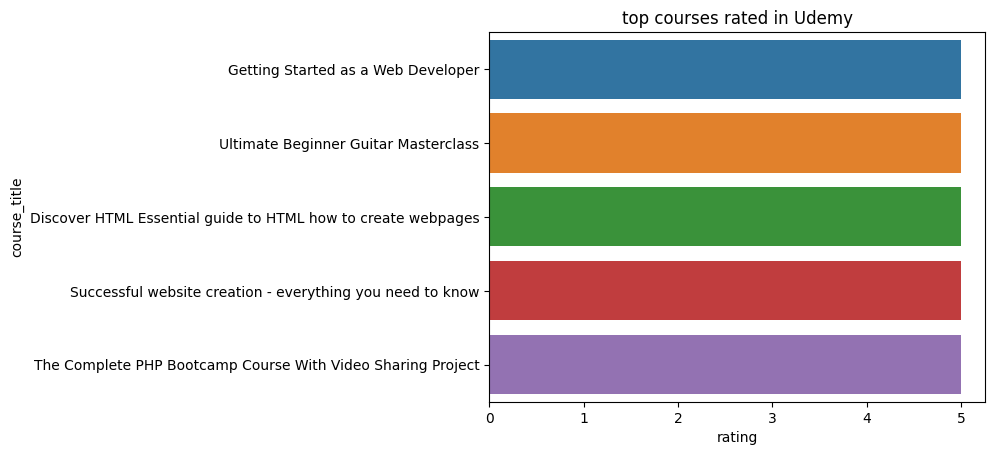

In [960]:
sns.barplot(data = top_rate , x = 'rating' , y = 'course_title')
plt.title('top courses rated in Udemy')

Top 5 de los cursos con mayor ventas

In [1117]:
top_venta = pd.DataFrame(udemy_courses.sort_values(by = 'sales' , ascending = False))[['title','sales']].head(5)

Text(0.5, 1.0, 'top courses rated in Udemy')

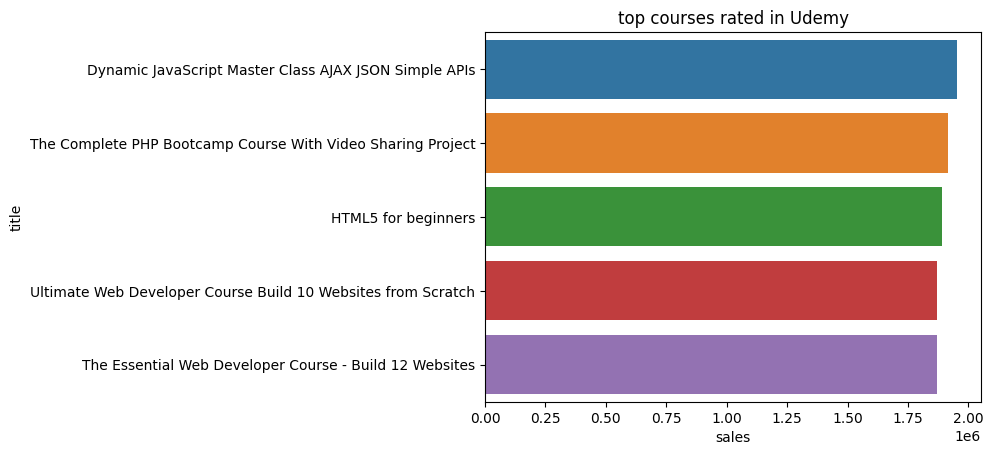

In [1118]:
sns.barplot(data = top_venta , x = 'sales' , y = 'title')
plt.title('top courses rated in Udemy')

Renombrar columnas para salvar los dataframe 

In [1092]:
coursera = coursera.rename(columns={'name':'title','ventas':'sales', 'languaje':'language'})

In [1093]:
coursera.head(2)

,title,institution,course_url,course_id,rating,level,language,n_enrolled,price,sales
0,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,5.0,Intermediate,English,35459.0,39,1382901.0
4,AI for Medical Prognosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-prognosis,5.0,Intermediate,English,101185.0,39,3946215.0


In [1086]:

edx_courses = edx_courses.rename(columns={'Level':'level','ventas':'sales'})

In [1087]:
edx_courses.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url,rating,sales
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online,4,6124020.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge,4,25781445.0


In [1082]:
udemy_courses['ventas']  = udemy_courses['price'] * udemy_courses['num_subscribers'] 

In [1090]:
udemy_courses = udemy_courses.rename(columns={'course_title':'title','num_subscribers':'n_enrolled','ventas':'sales', 'languaje':'language'})

In [1091]:
udemy_courses.head(2)

,course_id,title,url,is_paid,price,n_enrolled,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating,sales
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All,1.5,2017-01-18T20:58:58Z,Business Finance,English,2,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All,39.0,2017-03-09T16:34:20Z,Business Finance,English,2,209400


In [1103]:
columnas = ['title','n_enrolled','level','language','rating','price','sales']
coursera = coursera[columnas]
edx = edx_courses[columnas]
udemy = udemy_courses[columnas]

In [1104]:
coursera.to_csv('coursera.csv')
edx.to_csv('edx.csv')
udemy.to_csv('udemy.csv')

## Análisis de texto

In [1125]:
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
#print(stopwords.words('spanish'))

In [1126]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1128]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [1129]:
textos_title = ''
for row in coursera['title']: 
    textos_title = textos_title + ' ' + row

In [1130]:
stopwords_list = stopwords.words('english')

In [1131]:
textos_title = ' '.join([x for x in textos_title.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

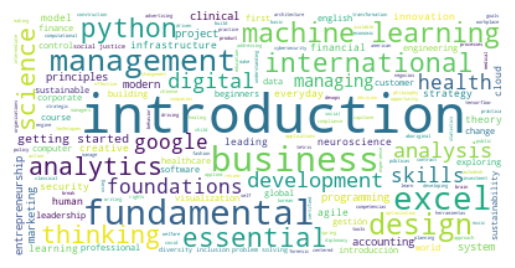

In [1133]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_title)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [1134]:
def wordcloud(data):
    textos_title = ''
    for row in data: 
        textos_title = textos_title + ' ' + row
    stopwords_list = stopwords.words('english')
    textos_title = ' '.join([x for x in textos_title.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])
    wc = WordCloud(background_color= 'white')
    wc.generate(textos_title)
    return wc

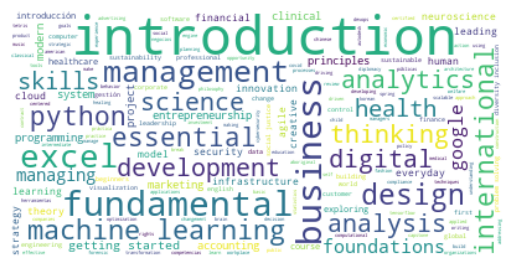

In [1135]:
wc = wordcloud(coursera.title)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

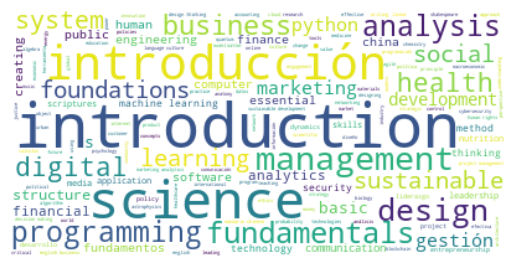

In [1136]:
wc = wordcloud(edx.title)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

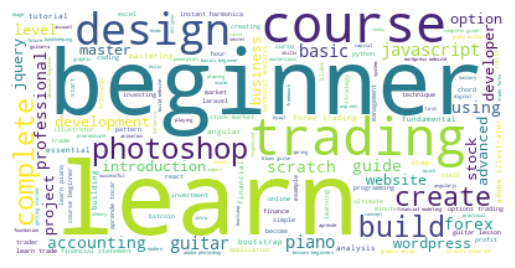

In [1137]:
wc = wordcloud(udemy.title)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()